# Linear Regression

## Univariate Linear Regression

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initializeParameter(n):
    W = np.zeros((n,1), dtype=float)
    b = np.zeros((1,1), dtype=float)
    return W, b

In [3]:
def predict(X, W, b):
    y_hat = np.dot(X, W) + b
    return y_hat

In [4]:
def computeCost(X, y, W, b):
    y_hat = predict(X, W, b)
    cost = (1/(2*m)) * np.sum(np.power(y_hat - y, 2))
    return cost

In [5]:
def gradientDescentUni(X, y, w, b, learning_rate, iterations):
    m, _ = y.shape
    costHistory = np.zeros((iterations), dtype=float)
    for i in range(0, iterations):
        y_hat = predict(X, w, b)
        cost = computeCost(X, y, w, b)
        dw = (1/m) * np.sum((y_hat - y) * X)
        db = (1/m) * np.sum((y_hat - y))
        w = w - learning_rate * dw
        b = b - learning_rate * db
        costHistory[i] = cost        
    return w, b, costHistory

Best parameter : W =  [[1.16636235]] b =  [[-3.63029144]]


C:\Users\ekoru\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


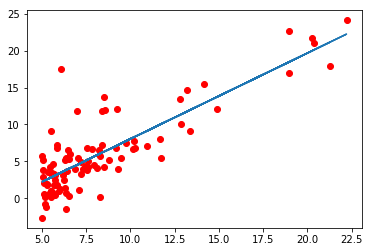

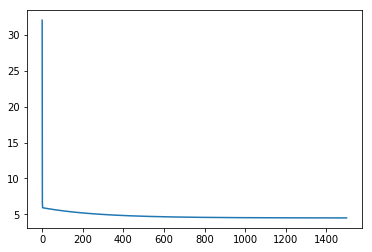

In [6]:
# Load dataset
path = os.getcwd()
data = pd.read_csv(path + "/Dataset/ex1data1.txt", sep=",", header=None)
data.columns = ["x", "y"]
dataset = data.as_matrix(columns=None)

# Get number of dataset
m, column = dataset.shape
n = column - 1

# Get input x
X = np.zeros((m,1), dtype=float)
X[:,0] = dataset[:,0]

# Get input y
y = np.zeros((m,1), dtype=float)
y[:,0] = dataset[:,1]

# Plot data using matplotlib
fig = plt.figure()
plt.plot(X, y, 'ro')

w, b = initializeParameter(n)
cost = computeCost(X, y, w, b)

iterations = 1500
learning_rate = 0.01

w, b, costHistory = gradientDescentUni(X, y, w, b, learning_rate, iterations)

print("Best parameter : W = ", w, "b = ", b)

y_hat = predict(X, w, b)

plt.plot(X, y_hat)

fig2 = plt.figure()
plt.plot(np.arange(iterations), costHistory)


## Multivariate Linear Regression

In [7]:
def featureNormalize(X, n):
    X_norm = X;
    mu = np.zeros((1,n), dtype=float)
    sigma = np.zeros((1,n), dtype=float)
    mu = np.mean(X, axis=0)
    sigma = np.max(X, axis=0) - np.min(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [8]:
def gradientDescentMulti(X, y, W, b, learning_rate, iterations):
    m, _ = y.shape
    costHistory = np.zeros((iterations), dtype=float)
    dW = np.zeros(W.shape)
    dWsize, _ = W.shape
    XSliced = np.zeros((m,1), dtype=float)
    for i in range(0, iterations):
        y_hat = predict(X, W, b)
        cost = computeCost(X, y, W, b)
        for j in range(0, dWsize):
            XSliced[:,0] = X[:,j]          
            dW[j,0] = (1/m) * np.dot((y_hat - y).T, XSliced)
            W[j,0] = W[j,0] - learning_rate * dW[j,0]
        db = (1/m) * np.sum((y_hat - y))
        b = b - learning_rate * db
        costHistory[i] = cost
        
    return W, b, costHistory

X before normalize :
[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]
 [1.985e+03 4.000e+00]
 [1.534e+03 3.000e+00]
 [1.427e+03 3.000e+00]
 [1.380e+03 3.000e+00]
 [1.494e+03 3.000e+00]]
mu : [2000.68085106    3.17021277]
sigma : [3626.    4.]
X after normalize :
[[ 0.02849397 -0.04255319]
 [-0.11050217 -0.04255319]
 [ 0.11012663 -0.04255319]
 [-0.16124679 -0.29255319]
 [ 0.27559822  0.20744681]
 [-0.00432456  0.20744681]
 [-0.12870404 -0.04255319]
 [-0.15821314 -0.04255319]
 [-0.17117508 -0.04255319]
 [-0.13973548 -0.04255319]]
Best Parameter :
W = 
[[479850.27934173]
 [ -3153.23386323]]
b = 
[[340412.65957447]]
Predict room price with size 1650 and 3 room 
size_norm : -0.09671286570982619
br_norm : -0.04255319148936165
price : [[294139.14411206]]


C:\Users\ekoru\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


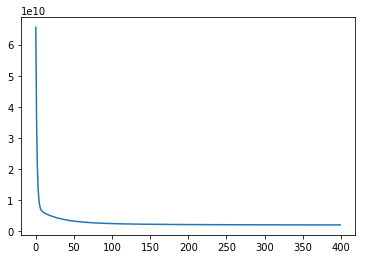

In [9]:
# Load dataset
path = os.getcwd()
data = pd.read_csv(path + "/Dataset/ex1data2.txt", sep=",", header=None)
data.columns = ["x1", "x2", "y"]
dataset = data.as_matrix(columns=None)
# print(dataset)

# Get number of dataset
m, column = dataset.shape
n = column - 1

# Get input x
# m = 5
X = np.zeros((m,n), dtype=float)
X[:,0:n] = dataset[0:m,0:n]

print("X before normalize :")
print(X[0:10,:])

X, mu, sigma = featureNormalize(X, n)

print("mu :", mu)
print("sigma :", sigma)
print("X after normalize :")
print(X[0:10,:])

# Get input y
y = np.zeros((m,1), dtype=float)
y[:,0] = dataset[0:m,n]

W, b = initializeParameter(n)

iterations = 400
learning_rate = 0.3

W, b, costHistory = gradientDescentMulti(X, y, W, b, learning_rate, iterations)

print("Best Parameter :")
print("W = ")
print(W)
print("b = ")
print(b)

print("Predict room price with size 1650 and 3 room ")
size_norm = (1650 - mu[0]) / sigma[0]
br_norm = (3 - mu[1]) / sigma[1]
price = predict(np.array([[size_norm, br_norm]]), W, b)

print("size_norm :", size_norm)
print("br_norm :", br_norm)
print("price :", price)

fig2 = plt.figure()
plt.plot(np.arange(iterations), costHistory)